## United Kingdom Traffic Accidents - EDA

Data link:https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales

# 1.Ask

What increases accident rates?

Can we predict accident rates over time?

How did countryside and urban areas differ?

# 2.Process

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets and Merging Them

In [2]:
df_2005_2007 = pd.read_csv('accidents_2005_to_2007.csv')
df_2009_2011 = pd.read_csv('accidents_2009_to_2011.csv')
df_2012_2014 = pd.read_csv('accidents_2012_to_2014.csv')

In [3]:
accidents = pd.concat([df_2005_2007,df_2009_2011,df_2012_2014])

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [5]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


### Data cleaning and feature engineering

In [6]:
selRows=accidents[accidents['Time'].isna()].index
accidents = accidents.drop(selRows,axis=0)
accidents["Time"] = pd.to_datetime(accidents["Time"],format='%H:%M')

In [7]:
accidents["Hour"] = accidents["Time"].dt.hour
accidents["Date"] = pd.to_datetime(accidents["Date"], format="%d/%m/%Y")
accidents["Month"] = pd.DatetimeIndex(accidents["Date"]).month

In [8]:
accidents["Number_of_Casualties"].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54], dtype=int64)

,Features,MissingPercent
4,Junction_Detail,100.000000
5,Junction_Control,40.076830
13,LSOA_of_Accident_Location,7.190065
12,Did_Police_Officer_Attend_Scene_of_Accident,0.194236
9,Road_Surface_Conditions,0.129934
8,Weather_Conditions,0.008379
0,Location_Easting_OSGR,0.006716
1,Location_Northing_OSGR,0.006716
2,Longitude,0.006716
3,Latitude,0.006716


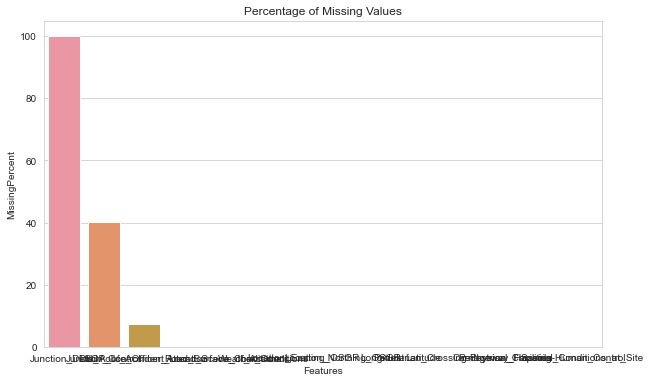

In [9]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent).set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(accidents)

There are 3 columns have missing data.We won't use them.

In [10]:
accidents_peryear = {}

years = ['2005', '2006', "2007", "2009", "2010", "2011", "2012", "2013", "2014"]
for year in years:
    accidents_peryear[year] = accidents[accidents["Year"]==int(year)]
accidents_perdow = {}

dow = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
for key in dow:
    accidents_perdow[dow[key]] = accidents[accidents["Day_of_Week"]==key]
    
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    

In [11]:
print("Before:", accidents_peryear["2007"]["Month"].unique())

accidents_peryear["2007"] = accidents_peryear["2007"].sort_values("Month")
print("After:", accidents_peryear["2007"]["Month"].unique())

Before: [ 6  7  8  9 10 11  1  2  3  4  5 12]
After: [ 1  2  3  4  5  6  7  8  9 10 11 12]


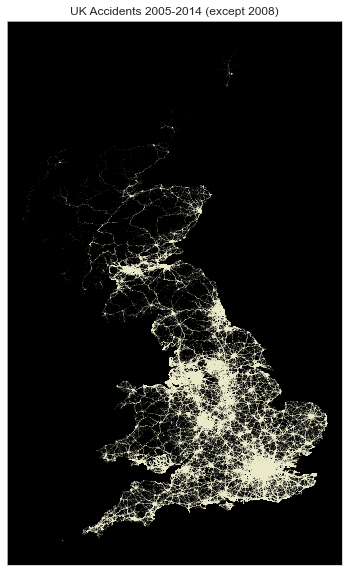

In [12]:
plt.figure(figsize=(6,10))
plt.axes().set_facecolor("black")
plt.scatter(x=accidents["Longitude"],
            y=accidents["Latitude"],s=0.003,alpha=0.3,color="lightyellow")
plt.title("UK Accidents 2005-2014 (except 2008)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Mean:167093.22222222222, Standard Deviation:21002.17589785507


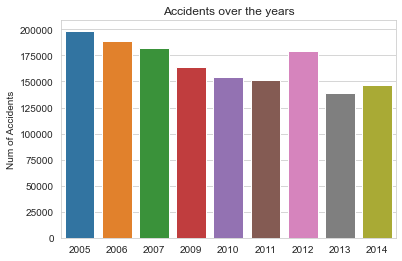

In [13]:
sns.barplot(x=accidents["Year"].value_counts().index,y=accidents["Year"].value_counts());
plt.ylabel("Num of Accidents")
plt.title("Accidents over the years");
print(f"Mean:{accidents.Year.value_counts().mean()}, Standard Deviation:{accidents.Year.value_counts().std()}")

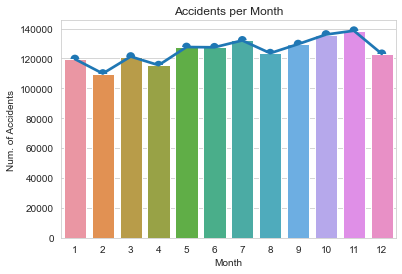


Mean:125319.92   Standard Deviation:8279.38



Month,1,2,3,4,5,6,7,8,9,10,11,12
Num. of Accidents,119566,109879,121248,115479,127610,127429,132031,123488,129558,135974,138525,123052


In [14]:
dfmonth = pd.DataFrame(accidents.groupby("Month")["Year"].count())
dfmonth = dfmonth.rename({"Year":"Num. of Accidents"}, axis=1)

sns.barplot(x = dfmonth.index, y = dfmonth["Num. of Accidents"])
sns.pointplot(x=dfmonth.index,y=dfmonth["Num. of Accidents"])
plt.title("Accidents per Month")
plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(dfmonth.mean().unique()), float(dfmonth.std().unique())))
dfmonth.T

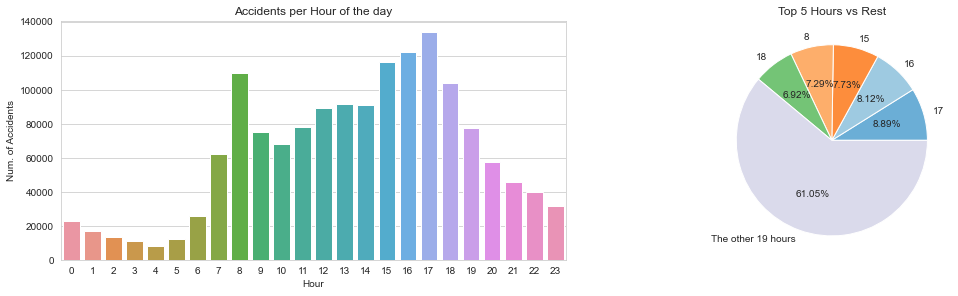


Mean:62659.96   Standard Deviation:39438.75

      Num. of Accidents
Hour                   
17               133728
16               122117
15               116250
8                109608
18               104067 



Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Num. of Accidents,23024,16886,13616,10826,8347,12032,25831,62368,109608,74893,...,91251,116250,122117,133728,104067,77717,57208,45746,39886,31875


In [15]:
df = pd.DataFrame(accidents.groupby("Hour")["Year"].count())
df = df.rename({"Year":"Num. of Accidents"}, axis=1)
top5hours = pd.DataFrame(df["Num. of Accidents"].nlargest(5))
elsehours = pd.DataFrame(data = {'Hour':'The other 19 hours',
                                 'Num. of Accidents':[df["Num. of Accidents"].nsmallest(19).sum()]})

elsehours.set_index("Hour", inplace=True)
topvsothers = pd.concat([top5hours, elsehours])


fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x = df.index, y = df["Num. of Accidents"])
axs[0].set_title("Accidents per Hour of the day")

cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 5, 6, 9,15]))
axs[1].pie(topvsothers["Num. of Accidents"], labels=topvsothers.index, autopct='%1.2f%%',colors=colors)
axs[1].set_title("Top 5 Hours vs Rest")

plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))
print(top5hours, "\n")
df.T

This could very well be a bar plot showing most traffic hours. Most accidents occur during day time, when there's more traffic. If we have a deeper look, we can see that Top 3 hours and Top 5 are between hours 15:00 - 18:59. Top 4 being 8:00 - 8:59. These 5 hours make up for almost 40% of the accidents.

We also have a mean value of 62,659.96 accidents per hour, with a Standard Deviation of 39,438.75. Obviously, a much more spread distribution than between different months.

#### Quick sum up viz: When do most car accidents occur?

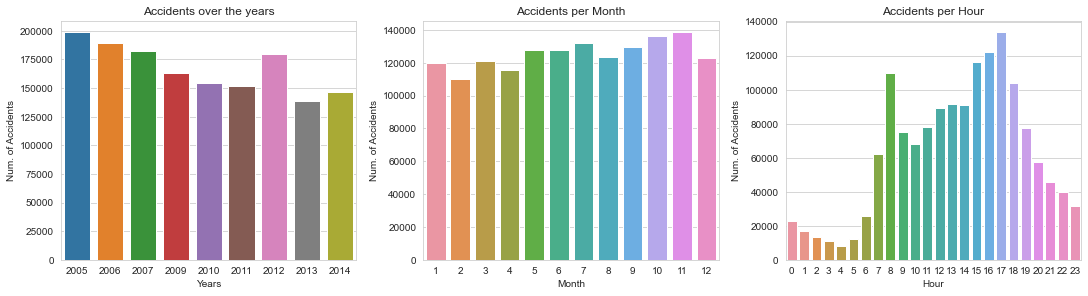


YEARLY - Mean:167093.22   Standard Deviation:21002.18

MONTHLY - Mean:125319.92   Standard Deviation:8279.38

HOURLY - Mean:62659.96   Standard Deviation:39438.75



In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
axs[0].set_ylabel("Num. of Accidents")
axs[0].set_xlabel("Years")
axs[0].set_title("Accidents over the years")

sns.barplot(ax=axs[1], x = dfmonth.index, y = dfmonth["Num. of Accidents"])
axs[1].set_title("Accidents per Month")

sns.barplot(ax=axs[2], x = df.index, y = df["Num. of Accidents"])
axs[2].set_title("Accidents per Hour")

plt.show()

print("\nYEARLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents.Year.value_counts().mean(), 
                                                                  accidents.Year.value_counts().std()))
print("\nMONTHLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(float(dfmonth.mean().unique()),
                                                                    float(dfmonth.std().unique())))
print("\nHOURLY - Mean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))